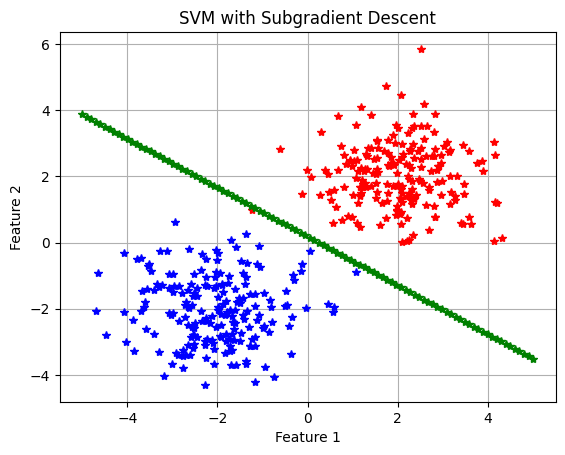

Learned weights: [0.40442417 0.54781716]
Learned bias: -0.0990401587663905


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data (assuming this mimics gendata in MATLAB)
def gendata(n_pos, n_neg):
    np.random.seed(42)
    X_pos = np.random.randn(n_pos, 2) + np.array([2, 2])
    X_neg = np.random.randn(n_neg, 2) + np.array([-2, -2])
    X = np.vstack((X_pos, X_neg))
    y = np.hstack((np.ones(n_pos), -np.ones(n_neg)))
    return X, y

# Generating data
X, y = gendata(200, 200)

# Initializing variables
m = X.shape[0]
w = np.array([0.0, 0.0])
b = 0.0
c = 4000  # Penalty parameter

# Subgradient descent for 1000 iterations
for i in range(1, 1001):
    sub1 = np.array([0.0, 0.0])
    sub2 = 0.0
    for t in range(m):
        if y[t] * (np.dot(w, X[t, :]) + b) < 1:
            sub1 += c / m * (-y[t] * X[t, :]) + w
            sub2 += c / m * (-y[t])
        else:
            sub1 += w
    w -= 1/i * sub1
    b -= 1/i * sub2

# Plotting the data
for k in range(m):
    if y[k] == -1:
        plt.plot(X[k, 0], X[k, 1], '*', color='blue')
    elif y[k] == 1:
        plt.plot(X[k, 0], X[k, 1], '*', color='red')

# Plotting the decision boundary
f = lambda u: -w[0]/w[1] * u - b/w[1]
t = np.linspace(-5, 5, 100)
y_boundary = f(t)
plt.plot(t, y_boundary, '*', color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Subgradient Descent')
plt.grid(True)
plt.show()

# Output the learned weights
print("Learned weights:", w)
print("Learned bias:", b)
